# Modelos lineales (ejercicio)

**Importante: comentar adecuadamente cada paso realizado**, relacionándolo con lo visto en la teoría.

## Parte 1: aplicación de modelos lineales a análisis de sentimientos

Se pide aplicar algunos de los clasificadores lineales vistos al problema de decidir si una crítica de cine es positiva o negativa. Para ello volvemos a usar los datos de IMDB (Internet Movie Database) que vimos en el módulo 2 (modelo probabilístico).

Los datos están disponibles en http://ai.stanford.edu/~amaas/data/sentiment/

Vectorizar los textos exactamente como se hizo en la sesión de trabajo del módulo 2, **con *stop_words* y *min_df=100***. 

Una vez los datos (entrenamiento y prueba) estén vectorizados, aplicar los siguientes clasificadores de scikit learn y medir el rendimiento obtenido:

* `LogisticRegression`
* `LinearSVC`

Probar en cada caso con distintos valores del parámetro `C` de regularización, para obtener el mejor rendimiento sobre el conjunto de test. Explicar claramente el efecto que tiene variar ese parámetro en un sentido o en otro. 

### Ejercicio
Lo primero que vamos a realizar, es leer y vectorizar los datos de IMDB siguiendo los pasos que vimos en el módulo 2. Vamos a utilizar el vectorizador aplicando *stop_words* y *min_df* para ganar eficiencia, y a continuación transformar en vectores tanto el conjunto de entrenamiento como el de pruebas.

In [9]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
reviews_train = load_files("data/aclImdb/train/")
reviews_test = load_files("data/aclImdb/test/")
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
vect = CountVectorizer(min_df=100, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

Ahora que ya está vectorizado, podemos aplicar los clasificadores. Vamos a empezar por el primero `LogisticRegression`, en el cual las predicciones se van a dar como probabilidades de pertenecer a la clase. Vamos a ver el rendimiento que obtenemos sin aplicar ninguna regularización (la que viene por defecto: $L_2$ con $C=1$).<br>
*Aclaración: se ha añadio el parámetro max_iter para evitar el warning: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.*

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.935
Rendimiento sobre el conjunto de prueba: 0.849


El rendimiento sobre el conjunto de entrenamiento es bueno, pero sobre el conjunto de prueba sí es más bajo. Vamos a probar ahora a cambiar la regularización (parámetro `C`) para ver si mejoramos los resultados. Teniendo en cuenta cuanto menor sea el valor de la constante `C`, mayor regularización se está aplicando (es el inverso de la cantidad de regularización), vamos a probar en primer lugar con una regularización baja (*`C`=100*) y luego con una regularización mas alta (*`C`=0.01*)

In [11]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg001.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.939
Rendimiento sobre el conjunto de prueba: 0.835
Rendimiento sobre entrenamiento: 0.897
Rendimiento sobre el conjunto de prueba: 0.872


Viendo los resultados, comprobamos que con menos regularización (*`C`=100*) obtenmos el máximo rendimiento sobre el conjunto de entrenamiento, lo que puede significar que se está sobreajustando. En cambio, con mayor regularización (*`C`=0.01*), se obtienen buenos resultados tanto en el conjunto de entrenamiento como en el conjunto de prueba.

Ahora vamos a aplicar el clasificador `LinearSVC`, que busca el hiperplano que separe la clases pero buscando maximizar la separación entre la frontera y el ejemplo de cada clase. Al clasificar, según el signo del resultado, estará en una lado u otro de la frontera de decisión (hiperplano de separación), lo que significa que se clasificará según el lado en el que esté.<br>
Como en el experimento anterior, vamos ver el rendimiento que obtenemos sin aplicar ninguna regularización (por defecto: $L_2$ con $C=1$), aplicando una regularización mayor (*`C`=0.01*) y otra menor (*`C`=100*)<br>
*Aclaración: se ha añadio el parámetro max_iter para evitar el warning: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.*

In [12]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=20000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(linear_svm.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.934
Rendimiento sobre el conjunto de prueba: 0.839


In [13]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=20000, C=100).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(linear_svm.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.927
Rendimiento sobre el conjunto de prueba: 0.835


/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=20000, C=0.01).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(linear_svm.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.924
Rendimiento sobre el conjunto de prueba: 0.866


Comparando los 3 resultados, podemos ver que con mayor regularización (*`C`=0.01*) obtenemos mejores resultados sobre el conjunto de prueba; en cambio con la regularización por defecto (*`C`=1*) se obtiene mejor resultado sobre el conjunto de entrenamiento, aunque muy leve la mejora pues la diferencia aplicando mayor regularización (*`C`=0.01*) es de 0.006

## Parte 2: modelos lineales para reconocimiento de dígitos escritos a mano


La función `load_digits` nos permite cargar una versión reducida de un conjunto de imágenes de dígitos escritos a mano (ver detalles en el manual):

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [16]:
digits = load_digits()

Podemos incluso visualizar los dígitos. Por ejemplo, este es el primero de ellos (un cero):

<Figure size 432x288 with 0 Axes>

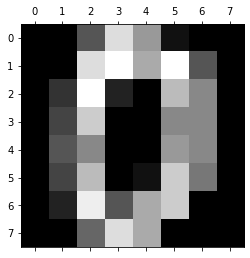

0


In [17]:
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target[0])

### 2.1 Clasificación de dígitos escritos a mano con regresión logística (multiclase)

Se pide aplicar regresión logística para obtener un clasificador para este problema multiclase. Probar con varios valores del parámetro `C` para obtener el mejor rendimiento sobre un conjunto de prueba. 

Algunas observaciones:

* Originalmente, en `digits.images` tenemos un array con 1797 arrays 8x8 (es decir, cada imagen viene en 64 pixeles distribuidos en 8 filas y 8 clolumnas). Para poder aplicar los clasificadores, cada imagen debe ser un vector de 64 componentes. Esto se consigue de manera sencilla con el método `reshape`de numpy. 
* Es necesario separar el conjunto de imágenes en entrenamiento y prueba. No olvidar hacerlo de manera estratificada (usando la opción `stratify`de `train_test_split`)
* Medir el rendimiento usando `score`. 

### Ejercicio
Tal como indica el enunciado, el primer paso para poder obtener un clasificador multiclase para este problema, es transformar el vector de las imágenes un uno de 64 componentes. Para ello obtenemos el número de imágenes (*no_img*) y utilizamos el método `reshape`de *numpy*

In [18]:
import numpy as np
no_img, rows, cols = digits.images.shape
imagesData = np.reshape(digits.images,(no_img, 64))

A continuación separamos los datos de las imágenes que tenemos en un conjunto de entrenamiento y otro prueba como hemos visto en sesiones anteriores mediante `train_test_split`

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagesData, digits.target, stratify=digits.target, random_state=462)

Ya que más adelante se va a calcular el rendimiento de aplicar `LogisticRegression`con distintos valores de `C`, se ha definido la función *logRegClas* la cual calcula el rendimiento para los distintos valores de `C` que se indiquen. Además de mostrar los rendimientos obtenidos, como resultado, devuelve el mejor clasificador, el valor de `C` con el que se obtiene y su rendimiento.

In [20]:
def logRegClas(C_vals, X_train, y_train, X_test, y_test):
    bestScore = -1
    bestC = C_vals[0]
    bestLogReg = LogisticRegression()
    for value in C_vals:
        logreg = LogisticRegression(max_iter=15000, C = value).fit(X_train, y_train)
        score = logreg.score(X_test, y_test)
        if score > bestScore:
            bestScore = score
            bestC = value
            bestLogReg = logreg
        print("Rendimiento sobre el conjunto de entrenamiento, valor de C={}: {:.3f}".format(value, logreg.score(X_train, y_train)))
        print("Rendimiento sobre el conjunto de test, valor de C={}: {:.3f}".format(value, score))
    return [bestLogReg, bestC, bestScore]

In [21]:
C_vals = [0.01, 0.1, 10, 100]
bestLogReg, bestC, bestScore = logRegClas(C_vals, X_train, y_train, X_test, y_test)
print("Mejor rendimiento: {:.3f}, valor de C={}".format(bestScore, bestC))

Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01: 0.993
Rendimiento sobre el conjunto de test, valor de C=0.01: 0.984
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.1: 1.000
Rendimiento sobre el conjunto de test, valor de C=0.1: 0.976
Rendimiento sobre el conjunto de entrenamiento, valor de C=10: 1.000
Rendimiento sobre el conjunto de test, valor de C=10: 0.969
Rendimiento sobre el conjunto de entrenamiento, valor de C=100: 1.000
Rendimiento sobre el conjunto de test, valor de C=100: 0.967
Mejor rendimiento: 0.984, valor de C=0.01


El mejor rendimiento sobre el conjunto de prueba se obtiene con la regularización *`C`= 0.01*. Observar que con los otro valores de regularización (han ido incrementando respecto a 0.01, lo cual significa, menor regularización) se obtiene el máximo rendimiento sobre el conjunto de entrenamiento, lo que significa que se está produciendo un sobreajuste.

### 2.2 Clasificación binaria usando regresión logística

Una vez encontrado un buen clasificador para el problema multiclase, mostrar la matriz de confusión finalmente obtenida sobre el conjunto de prueba. También mostrar las imágenes de un par de dígitos respectivamente hayan sido bien y mal clasificados.  Usando `predict_proba` mostrar las predicciones que realiza el modelo sobre esos dos dígitos, y comentar los resultados. 

Deducir de la matriz de confusión un par de dígitos que en general cueste más trabajo distinguir entre sí, y extraer de los datos sólo las imágenes correspondientes a esos dos dígitos. Por ejemplo: si se observa que entre el 8 y el 9 hay más errores de predicción, habría que extraer todas las imágenes de ochos y nueves y crear un conjunto de datos con ellas.  

Crear a partir de esos datos extraidos,  conjuntos de entrenamiento y prueba para aprender con regresión logística un clasificador que sea "especialista" es distinguir un dígito del otro. Como antes, probar con varios valores del parámetro para intentar obtener un buen rendimiento sobre el conjunto de prueba.

**Nota**: para extraer los datos correspondiente a un dígito, aplicar selección condicional de numpy. Por ejemplo, con `digits.target==8` obtenemos un array booleano en el que están a `True` solo las posiciones de los ejemplos cuyo target es 8. Si tenemos un array `a`, entonces `a[digits.target ==8]` es el array en el que se han seleccionado sólo esas posiciones.  
`  

### Ejercicio
Ahora que tenemos el mejor clasificador (*bestLogReg*) vamos a obtener la matriz de confusión (`confusion_matrix`), que dada las clasificaciones reales y las predicciones, evalúa la precisión de una clasificación.

In [22]:
# Matriz de confusion
prediction = bestLogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction)

Busquemos un valor que haya sido clasificado correctamente y otro que no. Para ello vamos a coger el primer valor que encontremos de la predicción (*prediction*), cuya clasificación real (*y_test*) coincida y otro que sea errónea.<br>
Empezaremos mostrando la imagen del dígito que se ha clasificado adecuadamente.

<Figure size 432x288 with 0 Axes>

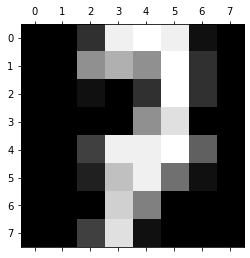

Número a clasificar:  7
Clasificación:  7


In [23]:
ok_index = -1
ko_index = -1
for i in range(len(prediction)):
    if ok_index == -1 and prediction[i] == y_test[i]:
        ok_index = i
    if ko_index == -1 and prediction[i] != y_test[i]:
        ko_index = i

# Dígito bien clasificado
plt.gray()
plt.matshow(X_test[ok_index].reshape(8,8)) 
plt.show()
print("Número a clasificar: ", prediction[ok_index])
print("Clasificación: ",y_test[ok_index])

In [24]:
bestLogReg.predict_proba([X_test[ok_index]])

array([[1.07517020e-05, 1.52567561e-05, 1.58378572e-04, 2.54607515e-03,
        1.05343465e-04, 1.40321021e-05, 6.66701665e-07, 9.96926851e-01,
        1.75999567e-04, 4.66453308e-05]])

Viendo la imagen podemos deducir que es un 7 y con `predict_proba` comprobamos la seguridad que tenía en cada predicción.<br>
Ahora vamos a repetir esta comprobación pero con un dígito que no ha sido bien clasificado.

<Figure size 432x288 with 0 Axes>

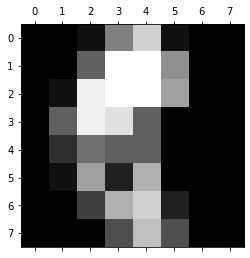

Número a clasificar:  1
Clasificación:  8


In [25]:
# Dígito mal clasificado
plt.gray()
plt.matshow(X_test[ko_index].reshape(8,8)) 
plt.show() 

print("Número a clasificar: ", prediction[ko_index])
print("Clasificación: ",y_test[ko_index])

In [26]:
bestLogReg.predict_proba([X_test[ko_index]])

array([[6.09455754e-03, 9.34919876e-01, 1.97891814e-04, 3.39517104e-05,
        2.61864683e-02, 6.60782999e-04, 1.05311904e-03, 3.80671376e-04,
        1.58042806e-02, 1.46684004e-02]])

Como podemos ver en la imagen, es díficil identificar qué numero es. Y viendo el resultado de `predict_proba`podemos ver que las clasificaciones más probables serían 1, 4, 8 y 9

Vamos a mostrar la matriz de confusión

In [27]:
print(conf_matrix)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  3  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  0 45]]


Viendo el resultado podemos deducir que el número que mejor clasifica es el 2, y los que peor el 3 y el 8. Vamos a extraer los datos correspondientes a estos 2 dígitos que más cuesta clasificar, para seguidamente crear a partir de estos un conjunto de entrenamiento y otro de prueba, con el objetivo de obtener un clasificador (mediante regresión logística) "especialista" en distinguir un dígito del otro.<br>
Como en experimentos anteriores, vamos a probar con distintos valores de `C` haciendo uso de la función definida *bestLogReg* y ver los rendimientos obtenidos.

In [28]:
filter = (digits.target == 3) | (digits.target == 8)
Y_filter_data = digits.target[filter]
X_filter_data = imagesData[Y_filter_data]

In [29]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_filter_data, Y_filter_data, stratify=Y_filter_data, random_state=462)

C_vals_f = [0.01, 0.1, 1, 10, 100]
bestLogReg_f, bestC_f, bestScore_f =logRegClas(C_vals, X_f_train, y_f_train, X_f_test, y_f_test)
print("Mejor rendimiento: {:.2f}, valor de C={}".format(bestScore_f, bestC_f))

Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01: 1.000
Rendimiento sobre el conjunto de test, valor de C=0.01: 1.000
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.1: 1.000
Rendimiento sobre el conjunto de test, valor de C=0.1: 1.000
Rendimiento sobre el conjunto de entrenamiento, valor de C=10: 1.000
Rendimiento sobre el conjunto de test, valor de C=10: 1.000
Rendimiento sobre el conjunto de entrenamiento, valor de C=100: 1.000
Rendimiento sobre el conjunto de test, valor de C=100: 1.000
Mejor rendimiento: 1.00, valor de C=0.01


A pesar de aplicar distintos valores de regularización, se obtiene siempre el máximo rendimiento, tanto en el conjunto de entrenamiento como en el de pruebas, lo que signfica que todos los modelos, tienen sobreajuste.

### 2.3 Clasificación de dígitos con SVC (multiclase)

Volviendo al problema multiclase de 2.1, aplicar ahora máquinas de vectores soporte con kernel (`SVC`) para el problema de reconocer los dígitos. Probar al menos con varios valores de los parámetros `C` y `gamma`, para obtener un buen rendimiento sobre el conjunto de prueba. 

### Ejercicio
Ahora vamos a aplicar `SVC`y ver el rendimiento que obtenemos con distintgos valores de regularización `C` y de `gamma` (anchura de kernel). Para ellos vamos a hacer un bucle similar al de la función *logRegClas* pero aplicando máquinas de vectores soporte con kernel (`SVC`) y la combinación de las distintas posibilidades de `C` y `gamma`.

In [30]:
from sklearn.svm import SVC
import itertools
svm_score = -1
svm_bestScore = -1
svm_bestScoreTrain = -1
svm_bestC = -1
svm_bestGamma = -1
C_vals_svm = [0.01, 0.1, 1, 10, 100]
Gamma_vals = [0.01, 0.1, 10, 50]
for C_val, gamma_val in itertools.product(C_vals_svm, Gamma_vals):
    svm = SVC(C=C_val, gamma=gamma_val).fit(X_train, y_train)
    svm_score = svm.score(X_test, y_test)
    svm_score_train = svm.score(X_train, y_train)
    if svm_score > svm_bestScore:
        svm_bestScore = svm_score
        svm_bestC = C_val
        svm_bestGamma = gamma_val
        svm_bestScoreTrain = svm_score_train
    print("Rendimiento sobre el conjunto de entrenamiento, valor de C={}, valor de gamma={}: {:.3f}".format(C_val, gamma_val, svm_score_train))
    print("Rendimiento sobre el conjunto de test, valor de C={}, valor de gamma={}: {:.3f}".format(C_val, gamma_val, svm_score))
print("\nMejor rendimiento: {:.3f}, valor de C={}, valor de gamma={}".format(svm_bestScore, svm_bestC, svm_bestGamma))
print("Rendimiento sobre el conjunto de entrenamiento: {}".format(svm_bestScoreTrain))
print("Rendimiento sobre el conjunto de test: {}".format(svm_bestScore))


Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01, valor de gamma=0.01: 0.102
Rendimiento sobre el conjunto de test, valor de C=0.01, valor de gamma=0.01: 0.102
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01, valor de gamma=0.1: 0.102
Rendimiento sobre el conjunto de test, valor de C=0.01, valor de gamma=0.1: 0.102
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01, valor de gamma=10: 0.102
Rendimiento sobre el conjunto de test, valor de C=0.01, valor de gamma=10: 0.102
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.01, valor de gamma=50: 0.102
Rendimiento sobre el conjunto de test, valor de C=0.01, valor de gamma=50: 0.102
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.1, valor de gamma=0.01: 0.102
Rendimiento sobre el conjunto de test, valor de C=0.1, valor de gamma=0.01: 0.102
Rendimiento sobre el conjunto de entrenamiento, valor de C=0.1, valor de gamma=0.1: 0.102
Rendimiento sobre el conjunto de test, valor de

Obtenemos el mejor rendimiento con *`C`=10* y *`gamma`=0.01, aunque sobre el conjunto de entrenamiento se produce sobreajuste.